In [1]:
import fastf1 as f1
from fastf1 import *
import fastf1.plotting
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Analysis of the 2022 Hungarian GP 

### Introduction

From the opening laps of the 2022 season, two teams have looked dominant in this year's battle for the F1 championship. Early engine problems however cost Red Bull valuable points allowing Charles Leclerc and Ferrari to take a strong lead at the start. But Max Verstappen and Red Bull fired back winnning 6 of 9 races and gaining a 63 point lead in the World Driver's Championship (WDC) as they headed to Hungary before the summer break.

Hungary looked like a weekend where Ferrari could have a strong performance and reduce Verstappen's advantage. During practice, the Ferrari's looked as though they would be setting the pace for the weekend as they topped the charts in free practice. To further solidify their weekend, the Red Bull of Max Verstappen suffered an engine problem during qualifying seeing him start the race in 10th place. The Ferraris finished a very exciting qualifying in 2nd and 3rd, but all evidence suggested they'd be able to take 1st and 2nd come race day.

Unfortunately, for Ferrari fans Max Verstappen would go on to win the Hungarian Grand Prix further cementing his lead in the 2022 WDC. During the race, many people questioned Ferrari's strategy calls and blamed them for the poor performance. 

<p style = "text-align:center;"><img src= "./images/Ferrari Clown.jpg" width = "400" height = "400"/></p>

This analysis will focus on trying to determine if the strategy used by Ferrari was appropriate or if the memes are true.

In [2]:

#Enable the cache
f1.Cache.enable_cache('cache')

#Get session data from Hungarian GP 2022
session = f1.get_session(2022, 'Hungary', 'R')

#Load session data
session.load()


core           INFO 	Loading data for Hungarian Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '44', '63', '55', '11', '16', '4', '14', '31', '5', '18', '10', '24', '47', '3', '20', '23', '6', '22', '77']


In [3]:

#Convert lap data to pandas dataframe
laps_df = pd.DataFrame(session.laps.pick_drivers(['VER', 'LEC', 'SAI', 'HAM', 'RUS']).reset_index(drop = True))

#Convert lap times to seconds
laps_df['LapTime'] = laps_df['LapTime'].dt.total_seconds()

### Start of the Race

The new 2022 regulations allow drivers to start on tires different from those they used in qualifying. This meant that Ferrari's main competitors, Red Bull and Mercedes, who outqualified the Ferrari drivers, could implement a different tire strategy for the race.

Figure 1 displays the tire choices for the top 10 drivers. From the start, the Ferraris decided to adopt a different strategy compared to Verstappen and Russell.

<p> &emsp; &emsp; &emsp; &emsp;&emsp; &emsp; &emsp; &emsp; &emsp; &emsp;&emsp; &emsp; &emsp; &emsp; &emsp; &emsp;&emsp; &emsp; &emsp; &emsp; &emsp; &emsp;&emsp; &emsp;&emsp; &emsp; &ensp;Figure 1: </p>
<p style = "text-align:center;"> <img src= "./images/Tyre Compound.PNG" width = "500" height = "300"/></p>

The softer the tire compound, the faster it will perform when fresh. However, because it is softer, it is susceptible to higher degradation, resulting in a significantly shorter lifespan.

This means that Ferrari will likely be slower on the harder compound initially but will be able to drive more laps before needing to make a pit stop. In contrast, Verstappen and Russell aim to gain or maintain track position early in the race by being faster than those around them on the softer tires.

The strategy helped Verstappen navigate through the field, allowing him to overtake his way to 5th place in just 12 laps of the 70-lap race. However, the gap between Verstappen and the leaders remained constant at around 10 seconds. The Ferraris and Russell were effectively managing their tires. Due to the challenges of traffic and an issue with his clutch, Verstappen was unable to unleash his maximum pace, which allowed the leaders, including his championship rival Charles Leclerc in third place, to maintain a faster pace throughout the first stint.

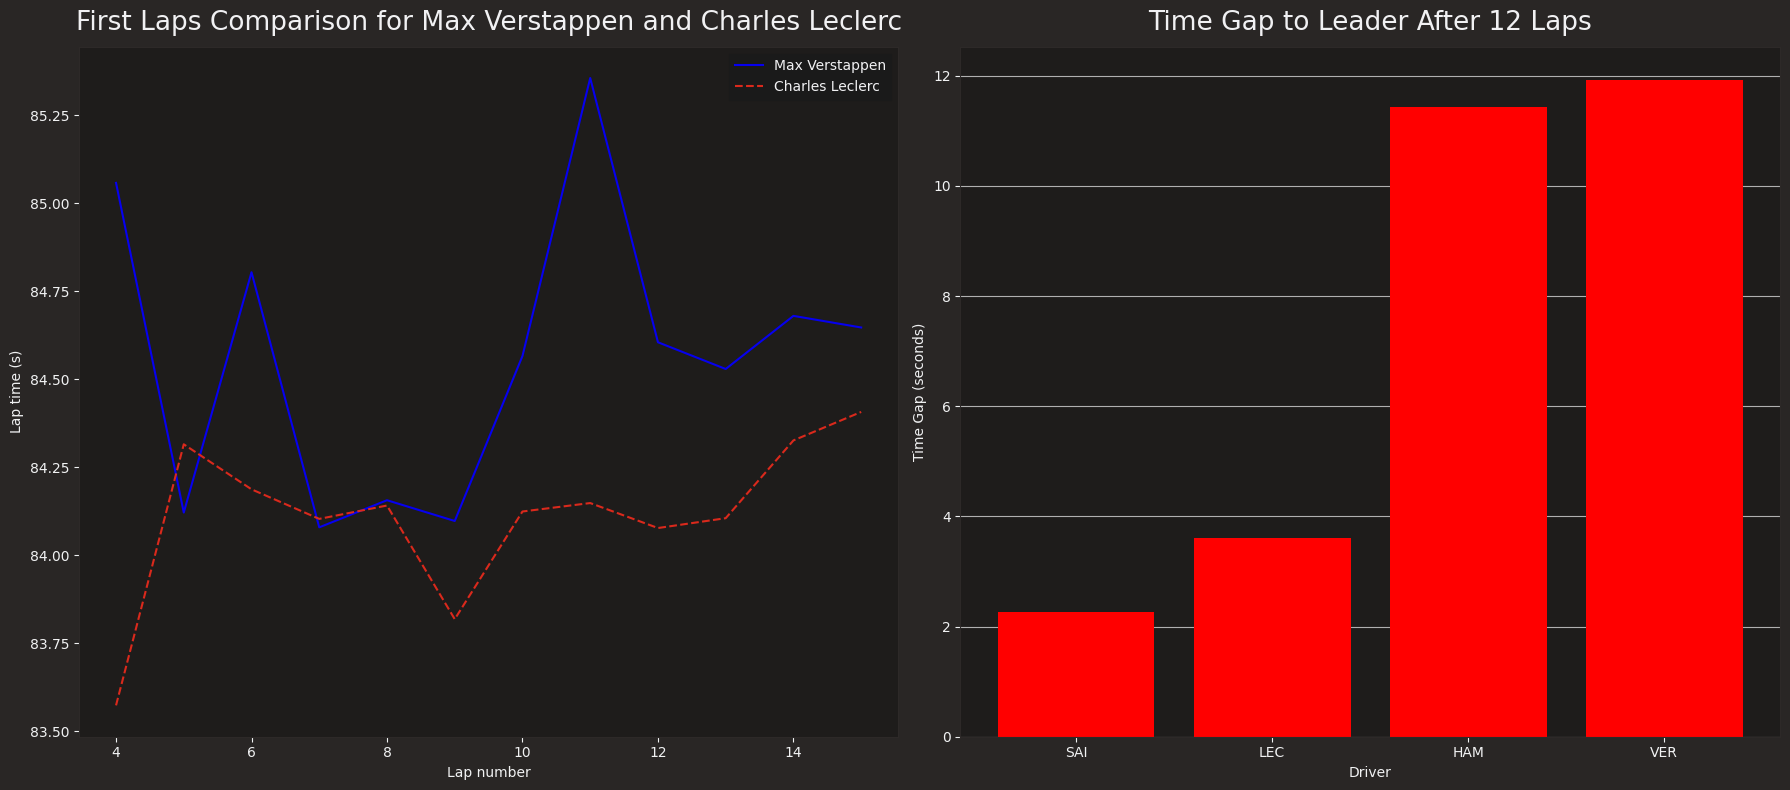

In [12]:
# Set template for plotting
fastf1.plotting.setup_mpl(mpl_timedelta_support=False, color_scheme='fastf1')

# Get laps for Max Verstappen and Charles Leclerc
#laps_df = pd.DataFrame(session.laps.pick_drivers(['VER', 'LEC']).reset_index(drop=True))
first_stint = laps_df[(laps_df['LapNumber'] >= 4) & (laps_df['LapNumber'] <= 15)]

# Prepare data for time gap calculation
time_laps_df = pd.DataFrame(session.laps.pick_drivers(['VER', 'LEC', 'RUS', 'SAI', 'HAM']).reset_index(drop=True))
laps_up_to_12 = time_laps_df[time_laps_df['LapNumber'] == 12]

# Calculate cumulative time for each driver up to lap 12
cumulative_time = laps_up_to_12.groupby('Driver')['LapStartTime'].max()
leader_time = cumulative_time.min()
time_gap = (cumulative_time - leader_time).dt.total_seconds()
time_gap = time_gap[time_gap.index != 'RUS']  # Remove RUS from dataframe
time_gap = time_gap.sort_values()
time_gap_df = time_gap.reset_index()

# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Plot 1: First Laps Comparison for Max Verstappen and Charles Leclerc
rbr_color = fastf1.plotting.get_team_color('RED', session)
fer_color = fastf1.plotting.get_team_color('FER', session)

ax1.set_title('First Laps Comparison for Max Verstappen and Charles Leclerc')
ax1.set_xlabel('Lap number')
ax1.set_ylabel('Lap time (s)')
ax1.plot(first_stint[first_stint['Driver'] == 'VER']['LapNumber'], 
         first_stint[first_stint['Driver'] == 'VER']['LapTime'], 
         color=rbr_color, label='Max Verstappen')
ax1.plot(first_stint[first_stint['Driver'] == 'LEC']['LapNumber'], 
         first_stint[first_stint['Driver'] == 'LEC']['LapTime'], 
         color=fer_color, label='Charles Leclerc', linestyle='--')
ax1.legend()

# Plot 2: Time Gap to Leader After 12 Laps
ax2.bar(time_gap_df['Driver'], time_gap_df['LapStartTime'], color = 'red')
ax2.set_title('Time Gap to Leader After 12 Laps')
ax2.set_xlabel('Driver')
ax2.set_ylabel('Time Gap (seconds)')
ax2.set_xticks(time_gap_df['Driver'])
ax2.grid(axis='y')

plt.tight_layout()
plt.show()

As the lap times for the soft tire users began to degrade, both Russell and Verstappen recognized that they would struggle to match the Ferrari pace on the medium tires for several more laps. Consequently, they opted to pit at the end of lap 16, allowing the Ferraris on medium tires to gain clear air and secure strong 1st and 2nd place positions. In an attempt to execute an overcut and gain an advantage by pitting later in the race, Carlos Sainz, the lead Ferrari, entered the pit on the following lap. Unfortunately, he experienced a slow pit stop, which hindered his ability to gain track position and also compromised his tire advantage by switching to another set of medium tires.


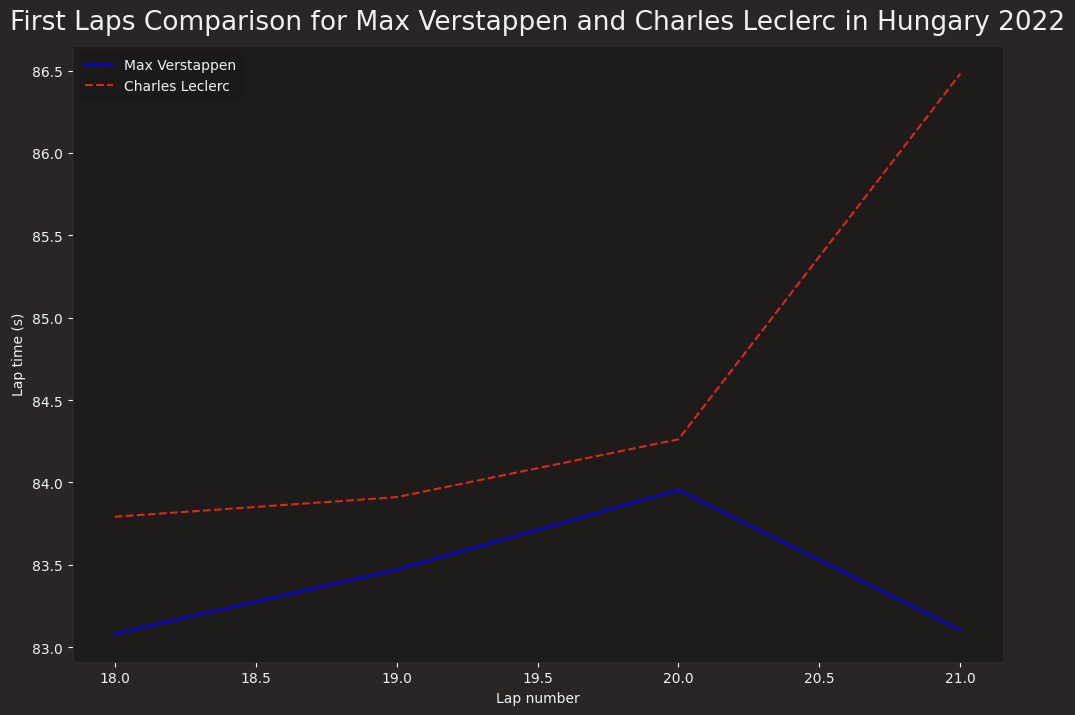

In [18]:
#Set template
fastf1.plotting.setup_mpl(mpl_timedelta_support=False, color_scheme = 'fastf1')

#Get laps for Max Verstappen and Charles Leclerc
first_laps_df = laps_df[(laps_df['Driver'] == 'VER') | (laps_df['Driver'] == 'LEC')]
first_stint = first_laps_df[(first_laps_df['LapNumber'] >= 18) & (first_laps_df['LapNumber'] <= 21)]

rbr_color = fastf1.plotting.get_team_color('RED', session)
fer_color = fastf1.plotting.get_team_color('FER', session)

fix, ax = plt.subplots(figsize = (12, 8))
ax.set_title('First Laps Comparison for Max Verstappen and Charles Leclerc in Hungary 2022')
ax.set_xlabel('Lap number')
ax.set_ylabel('Lap time (s)')

#sns.set_style('darkgrid')
ax.plot(first_stint[first_stint['Driver'] == 'VER']['LapNumber'], first_stint[first_stint['Driver'] == 'VER']['LapTime'], color = rbr_color, label = 'Max Verstappen')
ax.plot(first_stint[first_stint['Driver'] == 'LEC']['LapNumber'], first_stint[first_stint['Driver'] == 'LEC']['LapTime'], color = fer_color, label = 'Charles Leclerc', linestyle = '--') 

ax.legend()
plt.show()

Observing his teammate's unsuccessful overcut, Leclerc decided to stick with the initial tire strategy and extend his stint on the medium tires. Meanwhile, Max Verstappen demonstrated impressive pace on his new medium tires, significantly reducing the gap to the leader. To avoid rejoining behind both Russell and Verstappen after his pit stop, Leclerc was compelled to pit early as shown above on lap 21. A well-executed pit stop allowed Leclerc to regain second place, now trailing Russell but with tires that were five laps fresher. Allowing him to attack heavily and put pressure on Russell for the lead, eventually overtaking him on lap 31 in an impressive overtake and building a 5 second lead.

Seeing the tires slowly degrading for Verstappen and given power of the undercut, Redbull again try to overtake the Mercedes of George Russell and the Ferrari of Leclerc in the pits. Which started a chain reaction of his opponents as shown having to react and pit within the next few laps. However, for Ferrari because of their starting medium tire choice had to choose to take a hard tire or soft tire as two different compounds must be run during the race. Given the length left in the grand prix, Ferrari chose to take the hard tire for Leclerc and the visualizations below show how Leclerc's race came apart with this choice.

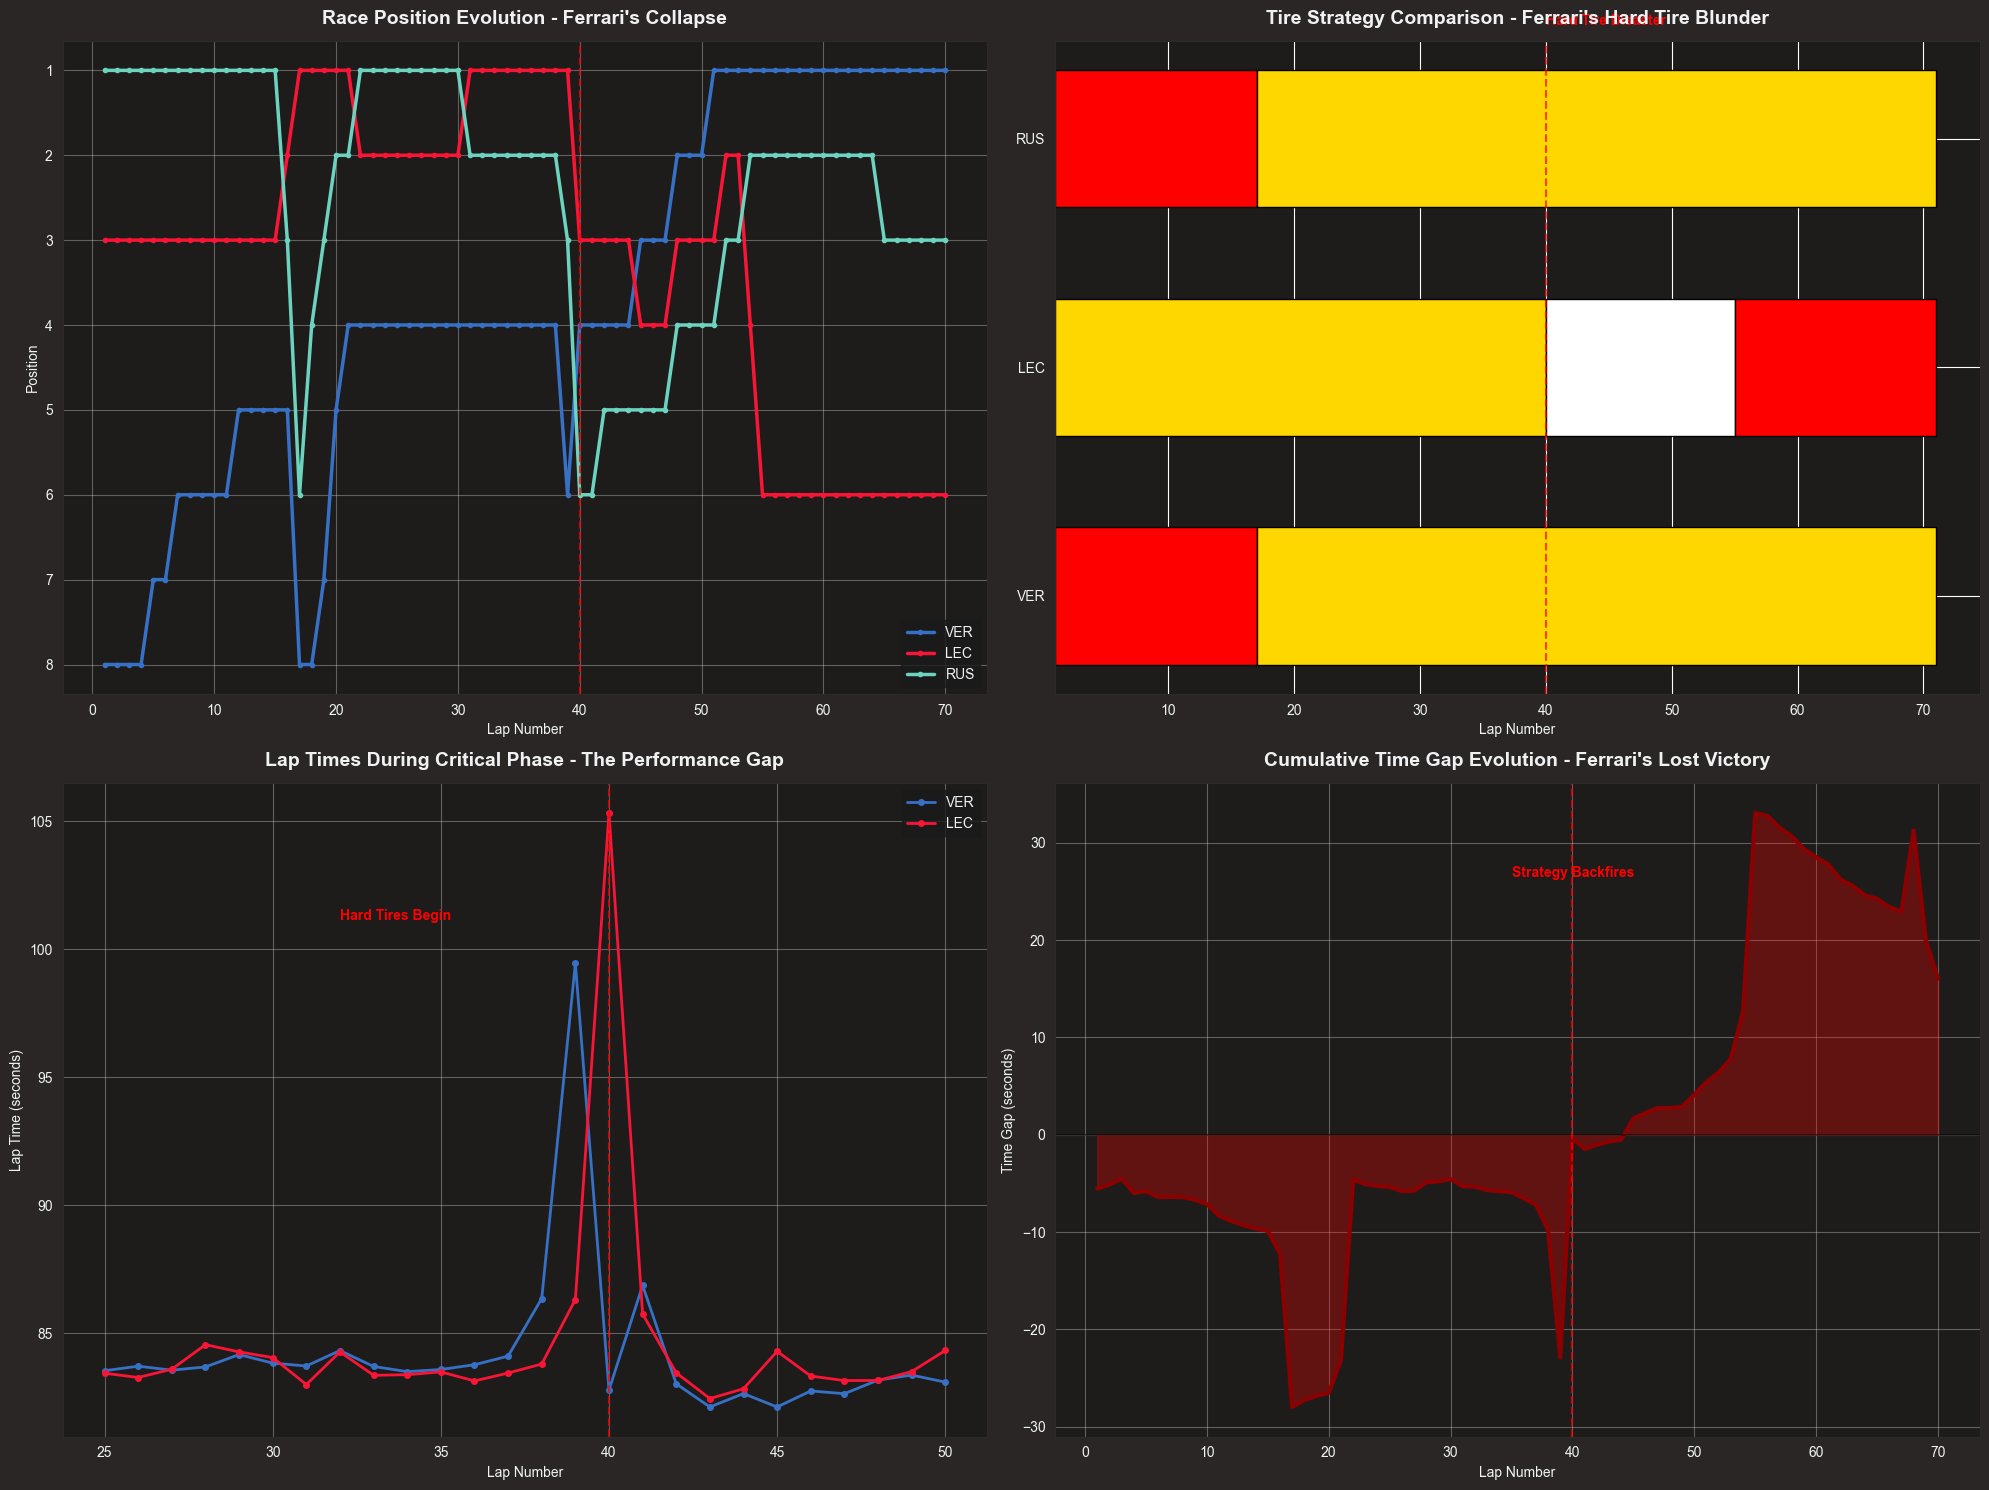

In [34]:
fastf1.plotting.setup_mpl(mpl_timedelta_support=False, color_scheme='fastf1')
# Let's conduct a comprehensive strategic analysis
# First, load ALL race data for deeper analysis

# Get complete race data for all drivers
all_laps = session.laps
all_drivers = ['VER', 'LEC',  'RUS']
race_laps = pd.DataFrame(all_laps.pick_drivers(all_drivers).reset_index(drop=True))

# Convert lap times to seconds for analysis
race_laps['LapTime'] = race_laps['LapTime'].dt.total_seconds()
race_laps['LapStartTime'] = race_laps['LapStartTime'].dt.total_seconds()

# Get pit stop data
pit_stops = []
for driver in all_drivers:
    driver_laps = race_laps[race_laps['Driver'] == driver].copy()
    
    # Identify pit stops by tire compound changes
    compound_changes = driver_laps['Compound'].ne(driver_laps['Compound'].shift())
    pit_laps = driver_laps[compound_changes & (driver_laps['LapNumber'] > 1)]
    
    for _, lap in pit_laps.iterrows():
        pit_stops.append({
            'Driver': driver,
            'Lap': lap['LapNumber'],
            'From_Compound': driver_laps[driver_laps['LapNumber'] == lap['LapNumber']-1]['Compound'].iloc[0] if lap['LapNumber'] > 1 else 'Start',
            'To_Compound': lap['Compound'],
            'LapTime': lap['LapTime']
        })

pit_stops_df = pd.DataFrame(pit_stops)

# Analyze the disastrous decision to put Leclerc on HARD tires
ferrari_drivers = ['LEC', 'SAI']
mercedes_drivers = ['HAM', 'RUS'] 
redbull_drivers = ['VER']

# Create position tracking throughout the race
position_evolution = []
for lap in range(1, 71):  # 70 lap race
    lap_data = race_laps[race_laps['LapNumber'] == lap]
    for driver in all_drivers:
        driver_data = lap_data[lap_data['Driver'] == driver]
        if not driver_data.empty:
            position_evolution.append({
                'Lap': lap,
                'Driver': driver,
                'Position': driver_data['Position'].iloc[0],
                'Compound': driver_data['Compound'].iloc[0],
                'LapTime': driver_data['LapTime'].iloc[0] if not pd.isna(driver_data['LapTime'].iloc[0]) else None
            })

position_df = pd.DataFrame(position_evolution)

# Focus on the crucial laps 30-40 where Ferrari made their fatal mistake
critical_period = position_df[(position_df['Lap'] >= 30) & (position_df['Lap'] <= 45)]

# Show Leclerc's position during this period
leclerc_critical = critical_period[critical_period['Driver'] == 'LEC'][['Lap', 'Position', 'Compound', 'LapTime']]

# Create figure with multiple subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 15))

# Plot 1: Position Evolution Throughout Race
key_drivers = ['VER', 'LEC', 'RUS']
colors = {'VER': '#3671C6', 'LEC': '#F91536', 'SAI': '#F91536', 'HAM': '#6CD3BF', 'RUS': '#6CD3BF'}

for driver in key_drivers:
    driver_positions = position_df[position_df['Driver'] == driver]
    ax1.plot(driver_positions['Lap'], driver_positions['Position'], 
             color=colors[driver], linewidth=2.5, label=driver, marker='o', markersize=3)

ax1.set_title('Race Position Evolution - Ferrari\'s Collapse', fontsize=14, fontweight='bold')
ax1.set_xlabel('Lap Number')
ax1.set_ylabel('Position')
ax1.invert_yaxis()  # P1 at top
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.axvline(x=40, color='red', linestyle='--', alpha=0.7, label='Leclerc Hard Tire Stint Begins')

# Plot 2: Tire Strategy Visualization
tire_stints = {}
for driver in key_drivers:
    driver_data = race_laps[race_laps['Driver'] == driver][['LapNumber', 'Compound']].copy()
    tire_stints[driver] = driver_data

y_pos = 0
tire_colors = {'SOFT': '#FF0000', 'MEDIUM': '#FFD700', 'HARD': '#FFFFFF'}

for driver in key_drivers:
    stints = tire_stints[driver]
    current_compound = None
    stint_start = 1
    
    for _, row in stints.iterrows():
        if current_compound != row['Compound']:
            if current_compound is not None:
                # End previous stint
                ax2.barh(y_pos, row['LapNumber'] - stint_start, left=stint_start, 
                        color=tire_colors[current_compound], edgecolor='black', height=0.6)
            
            current_compound = row['Compound']
            stint_start = row['LapNumber']
    
    # Final stint
    if current_compound:
        ax2.barh(y_pos, 70 - stint_start + 1, left=stint_start, 
                color=tire_colors[current_compound], edgecolor='black', height=0.6)
    
    y_pos += 1

ax2.set_title('Tire Strategy Comparison - Ferrari\'s Hard Tire Blunder', fontsize=14, fontweight='bold')
ax2.set_xlabel('Lap Number')
ax2.set_yticks(range(len(key_drivers)))
ax2.set_yticklabels(key_drivers)
ax2.axvline(x=40, color='red', linestyle='--', alpha=0.7)
ax2.text(40, 2.5, 'Hard Tire Disaster', color='red', fontweight='bold')

# Plot 3: Lap Time Comparison During Critical Period
critical_laps = race_laps[(race_laps['LapNumber'] >= 25) & (race_laps['LapNumber'] <= 50)]
for driver in ['VER', 'LEC']:
    driver_critical = critical_laps[critical_laps['Driver'] == driver]
    ax3.plot(driver_critical['LapNumber'], driver_critical['LapTime'], 
             color=colors[driver], linewidth=2, label=driver, marker='o', markersize=4)

ax3.set_title('Lap Times During Critical Phase - The Performance Gap', fontsize=14, fontweight='bold')
ax3.set_xlabel('Lap Number')
ax3.set_ylabel('Lap Time (seconds)')
ax3.grid(True, alpha=0.3)
ax3.legend()
ax3.axvline(x=40, color='red', linestyle='--', alpha=0.7)
ax3.text(32, ax3.get_ylim()[1] * 0.95, 'Hard Tires Begin', color='red', fontweight='bold')

# Plot 4: Cumulative Time Gap Analysis
verstappen_cumulative = []
leclerc_cumulative = []
gap_evolution = []

ver_time = 0
lec_time = 0

for lap in range(1, 71):
    ver_lap = race_laps[(race_laps['Driver'] == 'VER') & (race_laps['LapNumber'] == lap)]
    lec_lap = race_laps[(race_laps['Driver'] == 'LEC') & (race_laps['LapNumber'] == lap)]
    
    if not ver_lap.empty and not lec_lap.empty:
        ver_time += ver_lap['LapTime'].iloc[0]
        lec_time += lec_lap['LapTime'].iloc[0]
        gap_evolution.append({'Lap': lap, 'Gap': lec_time - ver_time})

gap_df = pd.DataFrame(gap_evolution)
ax4.plot(gap_df['Lap'], gap_df['Gap'], color='darkred', linewidth=3, label='Leclerc Gap to Verstappen')
ax4.axhline(y=0, color='black', linestyle='-', alpha=0.5)
ax4.fill_between(gap_df['Lap'], gap_df['Gap'], alpha=0.3, color='red')

ax4.set_title('Cumulative Time Gap Evolution - Ferrari\'s Lost Victory', fontsize=14, fontweight='bold')
ax4.set_xlabel('Lap Number')
ax4.set_ylabel('Time Gap (seconds)')
ax4.grid(True, alpha=0.3)
ax4.axvline(x=40, color='red', linestyle='--', alpha=0.7)
ax4.text(35, max(gap_df['Gap']) * 0.8, 'Strategy Backfires', color='red', fontweight='bold')

plt.tight_layout()
plt.show()


We can see that not only did Max catch Leclerc and pass him in just one lap, but the hard tires performed so poorly that Leclerc had to pit again just 15 laps later, 5 laps shorter than his stints on the mediums, even with the harder tire. This extra pit stop and lack of pace on the hard tires led to Leclerc coming in sixth when he likely could have one the race with some better tire strategy. 

## The Verdict: Ferrari's Strategic Catastrophe

Ferrari's downfall in Hungary 2022 serves as a masterclass in how reactive strategy can transform a commanding victory into a devastating defeat. Starting with a well-conceived medium tire strategy that effectively countered Red Bull's soft tire gamble, Ferrari held the strategic high ground with Leclerc leading and managing his tires beautifully through the first half of the race. However, the moment Red Bull initiated their second pit window on lap 39, Ferrari abandoned their own strategic vision and began chasing shadows. Instead of trusting their superior track position and tire management that had already proven successful, they panicked into the catastrophic hard tire decision on lap 40 - a compound that had shown poor performance all weekend. 

Had Ferrari simply maintained their original strategic framework and matched Red Bull's medium-to-medium strategy, Leclerc's five-lap tire advantage and track position would likely have secured victory. The data clearly shows that Ferrari's reactive approach - jumping from a winning strategy to chase Red Bull's moves - directly caused their collapse from first to sixth place. In Formula 1, the team that dictates strategy often wins; the team that merely reacts to strategy rarely does. Ferrari learned this lesson the hard way in Hungary, where their own strategic indecision handed Max Verstappen a victory that should have belonged to Charles Leclerc.

